Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection and Analysis

In [ ]:
#loading the data from csv file to a pandas Dataframe
customer_data = pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [ ]:
# first five rows in the data frame
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15,39.0
1,2,Male,21.0,15,81.0
2,3,Female,20.0,16,6.0
3,4,Female,NaN,16,77.0
4,5,Female,31.0,17,40.0


In [ ]:
#finding the number of rows and columns
customer_data.shape

(200, 5)

In [ ]:
#getting some information about the datasets
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     199 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  199 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.fillna(value = customer_data["Age"].mean(), inplace = True)

In [ ]:
#checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing annual Income Column & Spending Score Column

In [ ]:
X = customer_data.iloc[:,[3,4]].values

In [ ]:
print(X)

[[ 15.          39.        ]
 [ 15.          81.        ]
 [ 16.           6.        ]
 [ 16.          77.        ]
 [ 17.          40.        ]
 [ 17.          76.        ]
 [ 18.           6.        ]
 [ 18.          94.        ]
 [ 19.           3.        ]
 [ 19.          72.        ]
 [ 19.          14.        ]
 [ 19.          38.92964824]
 [ 20.          15.        ]
 [ 20.          77.        ]
 [ 20.          13.        ]
 [ 20.          79.        ]
 [ 21.          35.        ]
 [ 21.          66.        ]
 [ 23.          29.        ]
 [ 23.          98.        ]
 [ 24.          35.        ]
 [ 24.          73.        ]
 [ 25.           5.        ]
 [ 25.          73.        ]
 [ 28.          14.        ]
 [ 28.          82.        ]
 [ 28.          32.        ]
 [ 28.          61.        ]
 [ 29.          31.        ]
 [ 29.          87.        ]
 [ 30.           4.        ]
 [ 30.          73.        ]
 [ 33.           4.        ]
 [ 33.          92.        ]
 [ 33.        

Choosing the number of Customers

WCSS -> Within Clusters sum of squares

In [ ]:
#finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(X)


  wcss.append(kmeans.inertia_)

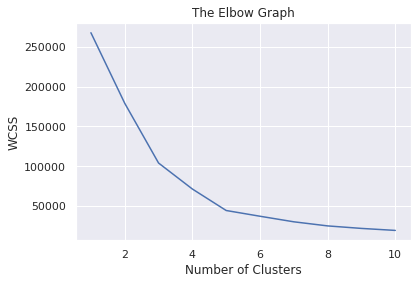

In [ ]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the K-Means Clustering Model

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a label for each data point based on thier cluster
Y = kmeans.fit_predict(X)


print(Y)

[4 3 4 3 4 3 4 3 4 3 4 4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters-0,1,2,3,4

Visualizing all the Clusters

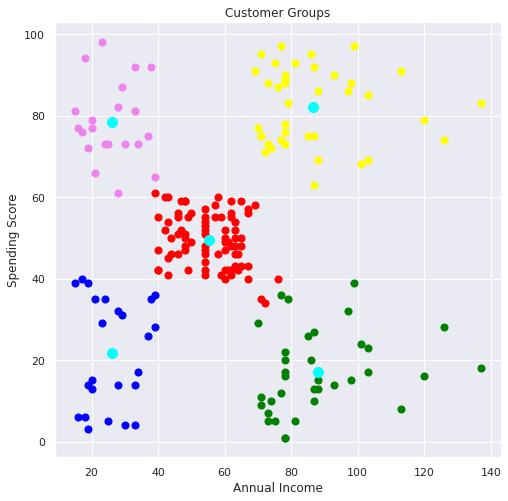

In [ ]:
#plotting all the clusters and thier centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()